# **Modelos de clasificación**

## **1. Support Vector Machines**

En esta segunda práctica del día, veremos un nuevo algoritmo para los problemas de clasificación: `SVM`.

En esta primera parte del notebook, explicaremos todo el funcionamiento del algoritmo y, en la segunda parte, lo emplearemos con un ejemplo.

Lo que hace `SVM` es encontrar un hiperplano (clasificador), recta en dos dimensiones, que separe las clases.

Partamos del siguiente ejemplo. Tenemos las calificaciones de los alumnos de un curso Data Science en dos materias. Por un lado, en el eje *x*, se encuentran las calificaciones para Matemática, mientras que en el eje *y*, las calificaciones en Estadística.

Cada punto del gráfico representa a un alumno. Los que están asignados con color celeste son aquellos a los que les ha ido bien en el curso. Los que están en rojo, mal.

<img src="..\_src\assets\svm_1.jpg" width="500" height="350">

Ahora, lo que queremos hacer es separar estos dos grupos. Una forma podría ser con una recta. 

Pero, para esto, tenemos varias posibilidades.

A saber:





|Opción A|Opción B|
|---|---|
|<img src="..\_src\assets\svm_2.jpg" width="500" height="350">|<img src="..\_src\assets\svm_3.jpg" width="500" height="350">|



Las dos rectas creadas separan correctamente las categorías de los alumnos que les fue bien de los que no. Pero, ¿en qué te basarías para elegir una u otra?

El valor de un clasificador no radica en lo bien que separa los datos de entrenamiento. Eventualmente, queremos que clasifique datos nuevos no vistos. Dada esta condición, queremos elegir una línea que capture el **`patrón general`** de los datos de entrenamiento, aumentando, así, las posibilidades de que le vaya bien con los datos que el modelo no ha visto.

La parte inferior de la recta de la **Opción A** se ubica demasiado cerca del grupo rojo, y la parte superior del grupo celeste. Estamos en presencia de una recta un poco *sesgada*. Aunque separe perfectamente los datos de entrenamiento, ¿qué ocurriría cuando llegue un punto de prueba nunca visto y esté alejado de los grupos?

En cambio, la recta de la **Opción B** separa uniformemente ambos grupos.

### *Diferenciar un buen clasificador de otro que no lo es*

<img src="..\_src\assets\svm_4.jpg" width="500" height="350">

+ Buscar rectas que clasifiquen correctamente los datos de entrenamiento.

+ Entre todas estas rectas, elegir la que tenga la mayor distancia **d** a los puntos más cercanos a ella. Los puntos más cercanos que identifican esta recta se conocen como vectores de apoyo (Support Vectors). Y la región que definen alrededor de la línea se conoce como el **Margen**.

Las SVM nos permiten elegir la mejor entre muchas fronteras, de modo que garantiza una mayor probabilidad de etiquetar correctamente a los datos nunca vistos.

Estos problemas se pueden aplicar a más dimensiones, pero para los fines de este notebook trabajaremos solo en 2D.
En el caso de 3D, buscaríamos el plano que mejor separe nuestros datos. Y, para más dimensiones, el hiperplano.

Volviendo a nuestro problema en 2D, si los datos se pueden separar por una recta se dice que resultan *linealmente separables*.

1. Para datos separables linealmente, las SVM funcionan muy bien
2. Para datos casi linealmente separables, se puede hacer que funcionen bien utilizando el parámetro *C*.
3. Para datos que no son linealmente separables, podemos proyectar datos en un espacio donde sean perfectamente/casi linealmente separables, lo que reduciría el problema al punto 1 o 2.

En el siguiente gráfico vemos cómo varían el clasificador y el margen a medida que aumentamos el valor de C.

<img src="..\_src\assets\svm_6.jpg" width="700" height="450">

### **SVM para datos casi linealmente separables**

Las SVM busca, por un lado, un amplio margen y, por el otro, un hiperplano que separe correctamente tantas instancias como sea posible. Pero no siempre pueden obtener ambas cosas.

El hiperparámetro *C* determina cuán grande es el deseo de una buena clasificación. Un valor más alto de *C* implica que queremos menos errores en los datos de entrenamiento.

Si los datos de entrenamiento no son perfectamente separables, se puede jugar con el valor de *C*, introduciendo cierto nivel de error en el entrenamiento, con tal de mejorar el rendimiento ante datos nunca vistos.

### **SVM para datos que no son linealmente separables**

En estos casos, se precisa de una frontera de decisión *no lineal*.

<img src="..\_src\assets\svm_8.jpg">


1. Se necesitan proyectar los datos originales a un espacio donde sí sean linealmente separables. Una vez proyectados, a la SVM le resulta muy fácil encontrar el hiperplano que los separe correctamente.
Para hacer esa proyección, se utiliza el `"truco del Kernel"`. Esta función lleva los datos a un nuevo espacio de mayor dimensiones.

2. Una vez proyectados y separados por un hiperplano, se puede volver al espacio original. En definitiva, los Kernels proyectan datos no separables de manera lineal a nuevos espacios donde sí sean separables de manera lineal (hiperplano).

Es difícil saber de antemano en qué espacio proyectar, pero es más probable que los datos sean linealmente separables cuando se proyectan a dimensiones superiores.
Se prueba y se corrobora en cuál funciona mejor.

### **Kernels**

Las funciones Kernels son las que le dan a las SVM su poder para separar los puntos no linealmente separables, en un espacio de mayor dimensionalidad.

Los Kernels más típicos son:

+ `Gaussiano`

+ `Sigmoide`

+ `Polinomial`

Normalmente no definimos una proyección específica para nuestros datos, sino que seleccionamos entre los Kernels disponibles. El Kernel es un **hiperparámetro**.

### **SVM para problemas multiclase**

El problema generalmente se aplica para clasificación y, a su vez, para una clasificación binaria. Pero existen algunos métodos para extenderlo a más de dos clases. Simplemente, aquí los enunciaremos:

+ One - versus - one

+ One - versus - all

+ DAGSVM

## **2. Implementación guiada**

Ya es el momento de pasar a poner en práctica todos los conceptos que estuvimos recorriendo en este notebook. Vamos a trabajar con un dataset de `Social Networks Ads`. Este conjunto de datos permite determinar si un usuario compró o no un producto en particular. Dejamos [aquí](https://www.kaggle.com/datasets/rakeshrau/social-network-ads) la página para que puedan descargarlo y acceder a toda su documentación.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Nos quedaremos como features con las columnas `Age` y `EstimatedSalary` (así podremos visualizar). Y, como target, utilizaremos la columna `Purchased`.

In [3]:
X = data.iloc[:, [2, 3]].values
Y = data.iloc[:, 4].values

Separamos los datos de entrenamiento de los datos de prueba

In [4]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state=0)

Estandarizamos (obviar esta parte por el momento, simplemente ejecutar)

In [5]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

Entrenamos. Para ello, utilizamos la clase `SVC` de la librería Scikit-Learn cuya documentación podrán encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [6]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)

SVC(kernel='linear', random_state=0)

Predecimos

In [7]:
Y_Pred = classifier.predict(X_Test)

Evaluamos

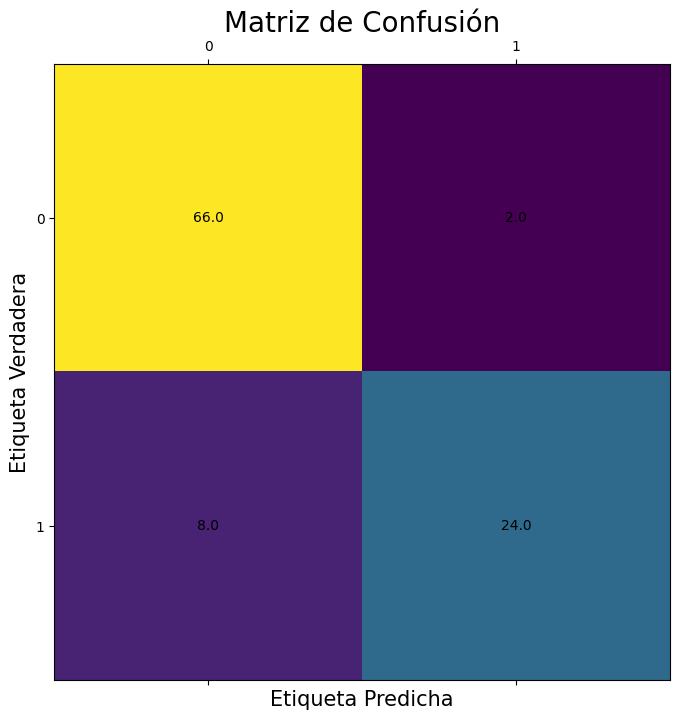

In [8]:
# Matriz de confusión 

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

*En la clase siguiente abordaremos esta métrica de evaluación propia de los problemas de clasificación.* 

Por el momento, alcanza con que sepan que 66 son las etiquetas que corresponden a la categoría **`0`** y el modelo las predijo correctamente. 2 las etiquetas que su categoría era **`0`** y el modelo predijo como **`1`**. Mientras que 8 son las etiquetas que su valor real era **`1`** y el modelo predijo como **`0`** y 24 las que eran **`1`** y el modelo predijo correctamente.

## Reporte de Clasificación

In [9]:
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



Procedemos a graficar la recta establecida por SVM para separar las categorías. Observamos cómo clasificó el modelo tanto en el set de entrenamiento como en el de testeo.

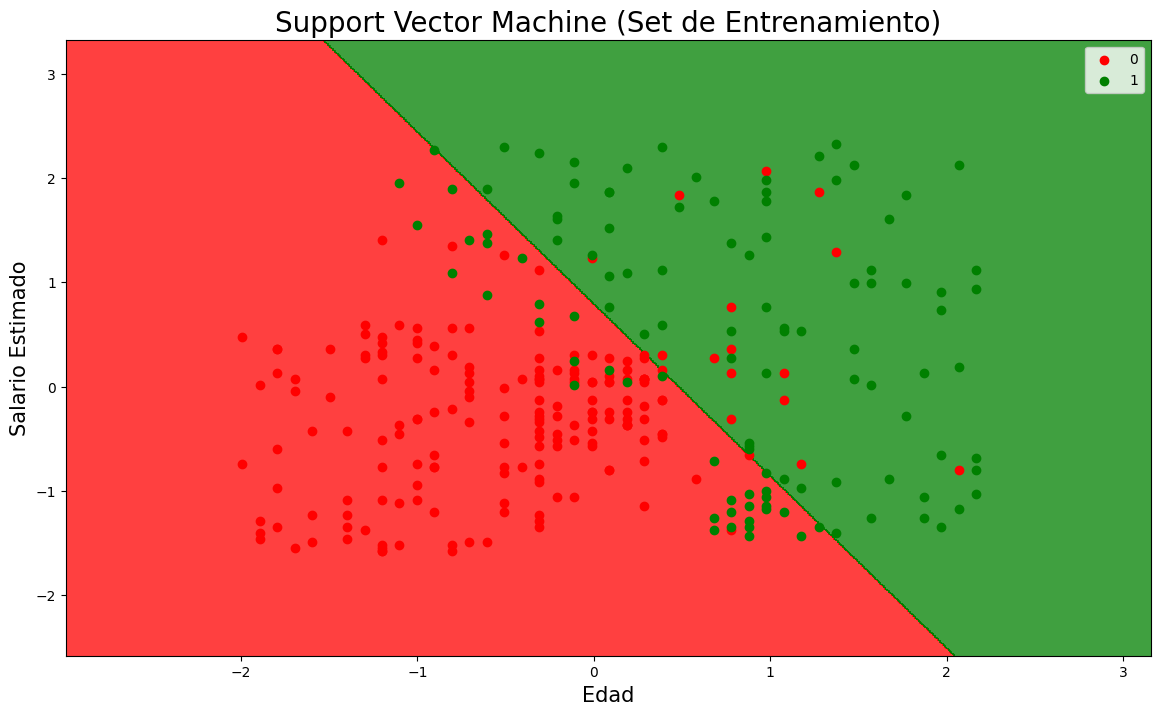

In [13]:
# Set de entrenamiento

from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(14,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Set de Entrenamiento)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

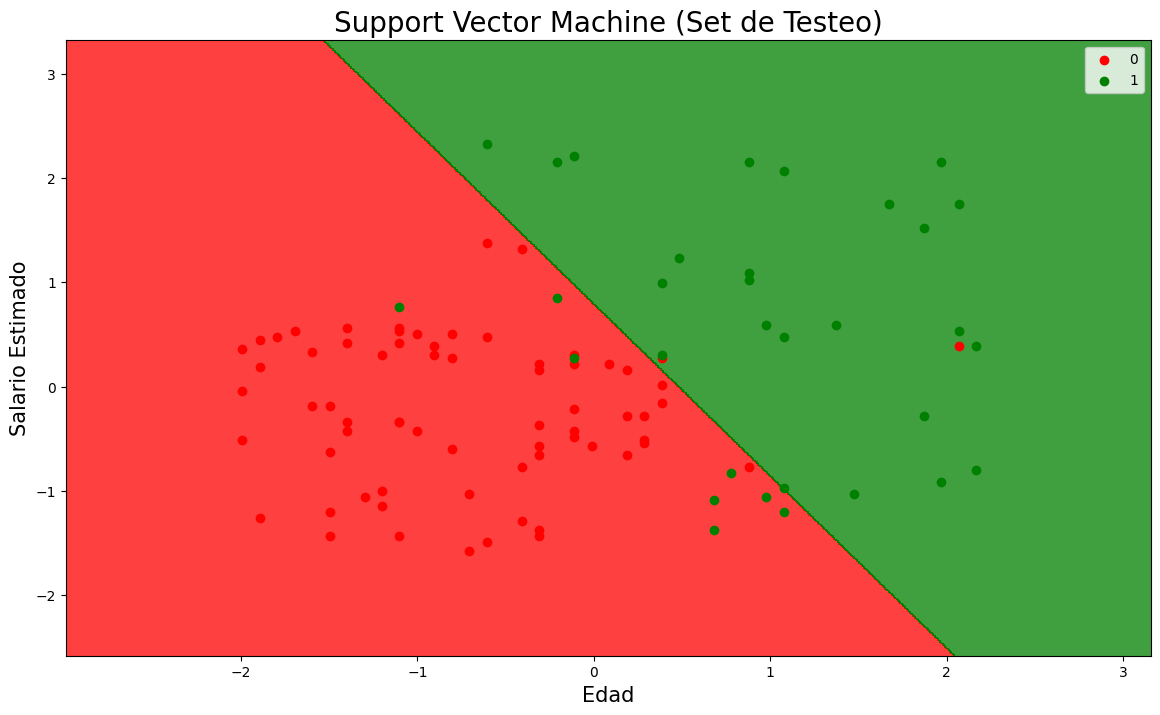

In [11]:
# Set de testeo

X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(14,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Support Vector Machine (Set de Testeo)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

Para probar:

1. Modificar el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el modelo y su performance.
2. Modificar el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el modelo y su performance ¿Cómo se puede interpretar la acción de `C`? 

### Practica Adicional

Implementar un modelo de SVM para el dataset Iris que trabajamos en la Práctica_1 de esta clase y, a su vez, probar su rendimiento con los distintos Kernels.